In [37]:
import pandas as pd

In [38]:
data = pd.read_parquet('data/data_with_nationality_1_openai.parquet', engine='pyarrow')

In [39]:
data.head(3)

,Text_EN,Text_PL,Text_RU,Translation_quality,OPENAI_far_right_EN_reasoning,OPENAI_far_right_EN_answer,OPENAI_far_right_PL_reasoning,OPENAI_far_right_PL_answer,OPENAI_far_right_RU_reasoning,OPENAI_far_right_RU_answer,...,OPENAI_prog_left_PL_reasoning,OPENAI_prog_left_PL_answer,OPENAI_prog_left_RU_reasoning,OPENAI_prog_left_RU_answer,OPENAI_centrist_EN_reasoning,OPENAI_centrist_EN_answer,OPENAI_centrist_PL_reasoning,OPENAI_centrist_PL_answer,OPENAI_centrist_RU_reasoning,OPENAI_centrist_RU_answer
1,<user> <user> <user> <user> Um the Kurds are h...,"<user> <user> <user> <user> Um, Kurdowie pomag...","<user> <user> <user> <user> Эм, курды помогают...",1.0,,1,,1,,1,...,,0,,0,,0,,0,,0
2,<user> This earpiece too plus a wire on his sl...,<user> Ta słuchawka też plus przewód na rękawa...,<user> Этот наушник тоже плюс провод на рукава...,1.0,,0,,0,,0,...,,0,,0,,1,,1,,0
3,<user> <user> Please lost you yelling insanely...,"<użytkownik> <użytkownik> Proszę, zgubcie się,...","<user> <user> Пожалуйста, потеряйтесь, безумно...",1.0,,0,,0,,0,...,,0,,1,,1,,1,,1


In [40]:
from pprint import pprint
i = 4
pprint(data.iloc[i, 0])
pprint(data.iloc[i, 1])
pprint(data.iloc[i, 2])
pprint(data.iloc[i, 3])
pprint(data.iloc[i, 4])
pprint(data.iloc[i, 5])
pprint(data.iloc[i, 6])
pprint(data.iloc[i, 7])
pprint(data.iloc[i, 8])
pprint(data.iloc[i, 9])

('Elections have consequences 101:  - Republican voters elected GOP US '
 'Senators to prevent leftwing fascists from subverting the SCOTUS;  - '
 'Republican voters elected GOP US Senators to put conservatives on the '
 'SCOTUS.  Vote <user>  #MAGA <user> <user> #KAG2020 <url>')
('Wybory mają konsekwencje 101: - Republikańscy wyborcy wybrali amerykańskich '
 'senatorów GOP, aby uniemożliwić lewicowym faszystom obalenie SCOTUS; - '
 'Republikańscy wyborcy wybrali amerykańskich senatorów GOP, aby umieścić '
 'konserwatystów w SCOTUS.  Zagłosuj na <użytkownik> #MAGA <użytkownik> '
 '<użytkownik> #KAG2020 <url>')
('Выборы имеют последствия 101: - избиратели-республиканцы избрали сенаторов '
 'США от GOP, чтобы не дать левым фашистам подмять под себя SCOTUS; - '
 'избиратели-республиканцы избрали сенаторов США от GOP, чтобы поставить '
 'консерваторов в SCOTUS.  Голосуй <user> #MAGA <user> <user> #KAG2020 <url>')
np.float64(1.0)
''
np.int64(0)
''
np.int64(0)
''
np.int64(0)


In [41]:
ticks = ['Far right EN', 'Far right PL',
       'Far right RU', 'Moderate conservative EN',
       'Moderate conservative PL', 'Moderate conservative RU',
       'Progressive left EN', 'Progressive left PL',
       'Progressive left RU', 'Centrist EN',
       'Centrist PL', 'Centrist RU']
deepseek_col = [col for col in data if col.startswith('OPENAI')]

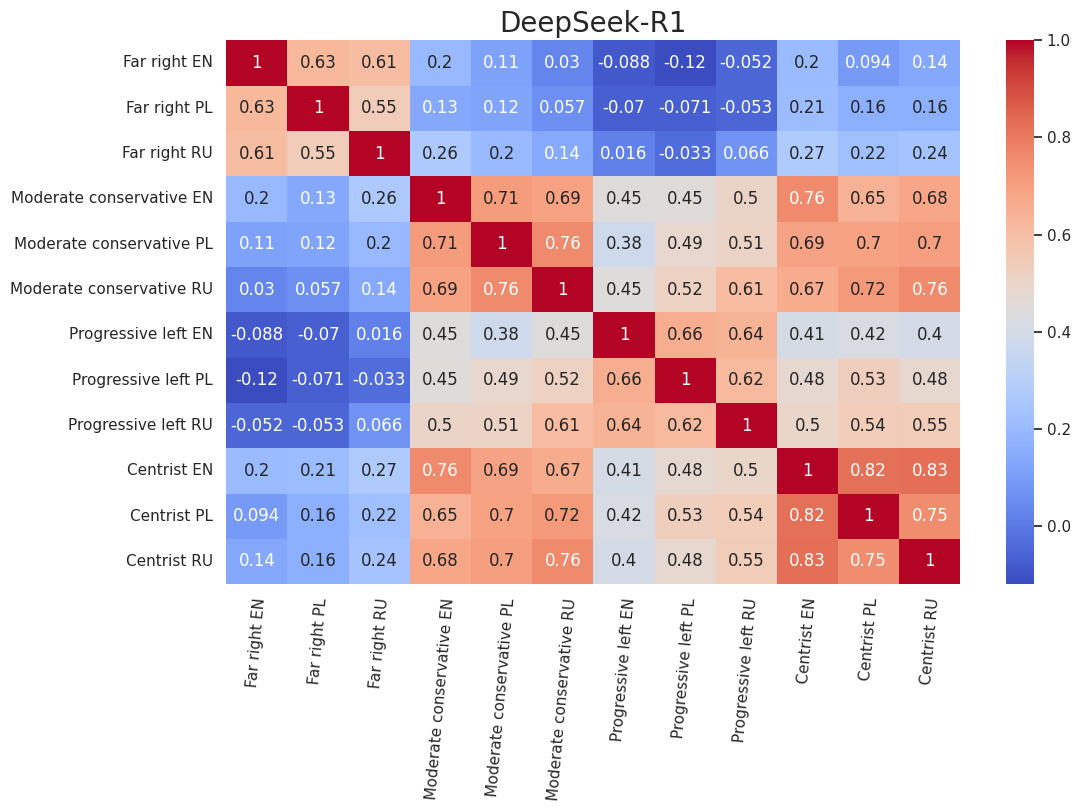

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
corr = data[data['Translation_quality'] == 1.0].drop(['Translation_quality'], axis=1)[deepseek_col].corr(numeric_only=True)
plot = sns.heatmap(corr, 
            xticklabels=ticks,
            yticklabels=ticks, annot=True, cmap="coolwarm")

plot.set_xticklabels(plot.get_xticklabels(), rotation=85)
plot.set_title('DeepSeek-R1', fontsize=20)
plt.tight_layout()

plt.savefig('data/correlation_plot_deepseek_r1.png', format='png', bbox_inches='tight')

In [36]:
from pprint import pprint
a = 0
for colname in [col for col in data.columns if col.endswith('_reasoning')]:
    for i in range(len(data[data[colname] != ''])):
        pprint("-"*30)
        pprint(data[data[colname] != ''].iloc[i, data.columns.get_loc(colname)])
        a += 1
print(a)

'------------------------------'
"{'type': 'summary_text', 'text': '0'} {'type': 'summary_text', 'text': '0'}"
'------------------------------'
("{'type': 'summary_text', 'text': 'I\\'m considering the user\\'s question "
 'about how Mark Thompson might label the statement "Go off sis." Based on '
 'what I know, Mark has a far-right perspective and tends to dismiss '
 'progressive language. The phrase itself is supportive and comes from African '
 "American Vernacular English, which suggests it\\'s not offensive. Mark\\'s "
 'likely reaction would be to label it as not offensive, dismissing its '
 'progressive connotation. So, my response here would simply be "0."\'}')
'------------------------------'
("{'type': 'summary_text', 'text': '**Interpreting an ambiguous "
 'comment**\\n\\nI’m considering how someone might downplay insults from those '
 'leaning right while seeing progressive remarks as aggressive. However, '
 'there’s not enough context about who made the comment. Initially,

In [7]:
far_right = data[data['Translation_quality'] == 1.0].drop(['Translation_quality'], axis=1).iloc[:, [4,6,8]]
mod_cons = data[data['Translation_quality'] == 1.0].drop(['Translation_quality'], axis=1).iloc[:, [10, 12, 14]]

In [8]:
far_right_diff = data.loc[far_right[far_right.var(axis=1) > 0].index.tolist(),]
mod_cons_diff = data.loc[mod_cons[mod_cons.var(axis=1) > 0].index.tolist(),]

In [9]:
len(mod_cons_diff)

78

In [10]:
i = 8
pprint(far_right_diff.iloc[i, 0])
pprint(far_right_diff.iloc[i, 1])
pprint(far_right_diff.iloc[i, 2])
pprint(far_right_diff.iloc[i, 4])
pprint(far_right_diff.iloc[i, 5])
pprint(far_right_diff.iloc[i, 6])
pprint(far_right_diff.iloc[i, 7])
pprint(far_right_diff.iloc[i, 8])
pprint(far_right_diff.iloc[i, 9])

('<user> <user> <user> <user> First.  You voted for a racist black face Prime '
 'Minister who is up to his neck and ethics violations. You have no moral or '
 'intellectual ground to stand on here or anywhere.  Second. If you pulled '
 'your head out of CNN’s ass, do you know how ridiculous this post is of '
 'yours: <url>')
('<user> <user> <user> Po pierwsze.  Głosowałeś na rasistowskiego premiera o '
 'czarnej twarzy, który jest po szyję i narusza zasady etyki. Nie masz '
 'moralnego ani intelektualnego gruntu, na którym mógłbyś stanąć tutaj lub '
 'gdziekolwiek.  Po drugie. Jeśli wyciągnąłeś głowę z tyłka CNN, czy wiesz, '
 'jak śmieszny jest ten post: <url>')
('<user> <user> <user> <user> Во-первых.  Ты проголосовал за расистского '
 'премьер-министра с черным лицом, который по уши погряз в нарушениях этики. У '
 'тебя нет никакой моральной или интеллектуальной почвы, чтобы стоять на ней '
 'здесь или где-либо еще.  Во-вторых. Если ты вытащил свою голову из задницы '
 'CNN, то зна

In [11]:
i = 0
pprint(mod_cons_diff.iloc[i, 0])
pprint(mod_cons_diff.iloc[i, 1])
pprint(mod_cons_diff.iloc[i, 2])
pprint(mod_cons_diff.iloc[i, 10])
pprint(mod_cons_diff.iloc[i, 11])
pprint(mod_cons_diff.iloc[i, 12])
pprint(mod_cons_diff.iloc[i, 13])
pprint(mod_cons_diff.iloc[i, 14])
pprint(mod_cons_diff.iloc[i, 15])

"<user> By cheating. That's the only way."
'<user> Oszukując. To jedyny sposób.'
'<user> С помощью жульничества. Это единственный способ.'
("Okay, let's try to figure out how Linda would label this statement. The "
 'statement is "By cheating. That\'s the only way." \n'
 '\n'
 "First, I need to consider Linda's background. She's a moderate conservative "
 "who values civility and tradition. She doesn't like extreme rhetoric from "
 'either side. She might find vulgar or conspiratorial content offensive, even '
 "if it's from the right. But she's sympathetic to policy critiques of "
 'Democrats, like "Defund the Police" slogans.\n'
 '\n'
 'Now, the statement here is short. "By cheating. That\'s the only way." It '
 'sounds like someone is accusing another group of achieving something through '
 "cheating. Without more context, it's a bit hard, but maybe this is in "
 "response to a political situation, like election fraud claims. If that's the "
 "case, Linda might view it as a conspira

/home/pihul/Desktop/Projects/Magisterka/.venv/lib64/python3.13/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/home/pihul/Desktop/Projects/Magisterka/.venv/lib64/python3.13/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate obj

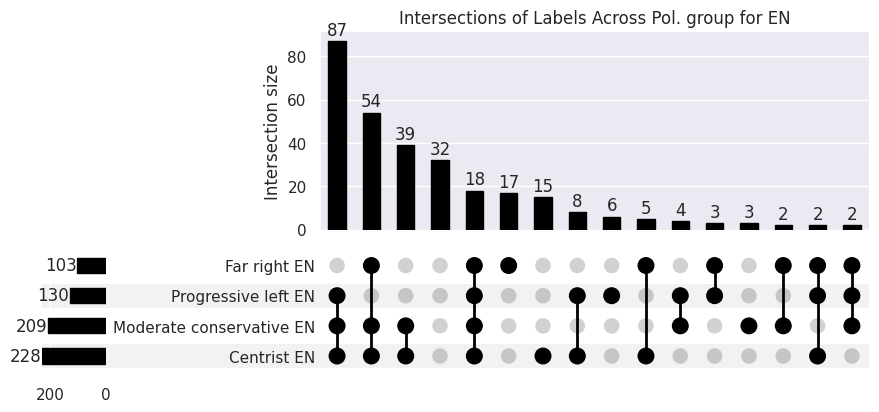

In [12]:
import matplotlib.pyplot as plt
from upsetplot import UpSet, from_indicators
df = data[data['Translation_quality'] == 1.0].drop(['Translation_quality'], axis=1).iloc[:, [4, 10, 16, 22]]
# Assume binary columns like 'model1', 'model2', etc.
df_binary = df[df.columns.to_list()] == 1.0
df_binary.columns = ['Far right EN', 'Moderate conservative EN', 'Progressive left EN', 'Centrist EN']
upset_data = from_indicators(df_binary.columns, df_binary)

UpSet(upset_data, show_counts=True, sort_by='cardinality').plot()
plt.title("Intersections of Labels Across Pol. group for EN")
plt.show();


In [13]:
EN_results = [87, 54, 39, 32, 18, 17, 15, 8, 6, 5, 4, 3, 3, 2, 2, 2]
PL_results = [78, 57, 34, 32, 39, 12, 9, 3, 4, 5, 1, 6, 11, 5, 1, 0]
RU_results = [72, 43, 40, 35, 16, 14, 23, 8, 7, 25, 4, 2, 4, 3, 1, 0]

In [14]:
import numpy as np
from scipy.stats import chi2_contingency

# Create 2 x 15 contingency table
table = np.array([EN_results, RU_results])
chi2_stat, p_value, dof, expected = chi2_contingency(table)
print(f"Chi-square statistic: {chi2_stat}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {p_value}")


Chi-square statistic: 21.188130658323438
Degrees of freedom: 15
P-value: 0.13092540916846754


In [15]:
Far_right = [149, 79, 27, 11, 10, 8, 7, 6]
Mod_conv = [52, 167, 26, 28, 6, 4, 5, 9]
Progr = [127, 79, 23, 22, 9, 8, 14, 15]
Centrist = [47, 205, 7, 7, 8, 7, 8, 8]

In [21]:
Polish = [78, 57, 39, 34, 32, 12, 11, 9, 6, 5, 5, 4, 3, 1, 1, 0]
Russian = [72, 43, 16, 40, 35, 14, 4, 0, 2, 3, 25, 7, 8, 4, 1, 0]
English = [87, 54, 18, 39, 32, 17, 3, 15, 3, 2, 5, 6, 8, 4, 2 ,2]
print(len(Polish), len(Russian), len(English))

16 16 16


In [24]:
import numpy as np
from scipy.stats import chi2_contingency


# Create 2 x 15 contingency table
table = np.array([English, Polish])
chi2_stat, p_value, dof, expected = chi2_contingency(table)
print(f"Chi-square statistic: {chi2_stat}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {p_value}")


Chi-square statistic: 24.67657045939869
Degrees of freedom: 15
P-value: 0.05445923473562065


# Mistral

In [19]:
data = pd.read_parquet('data/data.parquet', engine='pyarrow')

In [20]:
ticks = ['Far right EN', 'Far right PL',
       'Far right RU', 'Moderate conservative EN',
       'Moderate conservative PL', 'Moderate conservative RU',
       'Progressive left EN', 'Progressive left PL',
       'Progressive left RU', 'Centrist EN',
       'Centrist PL', 'Centrist RU']
mistral_col = [col for col in data if col.startswith('Mistral')]

Text(0.5, 1.0, 'Correlation plot')

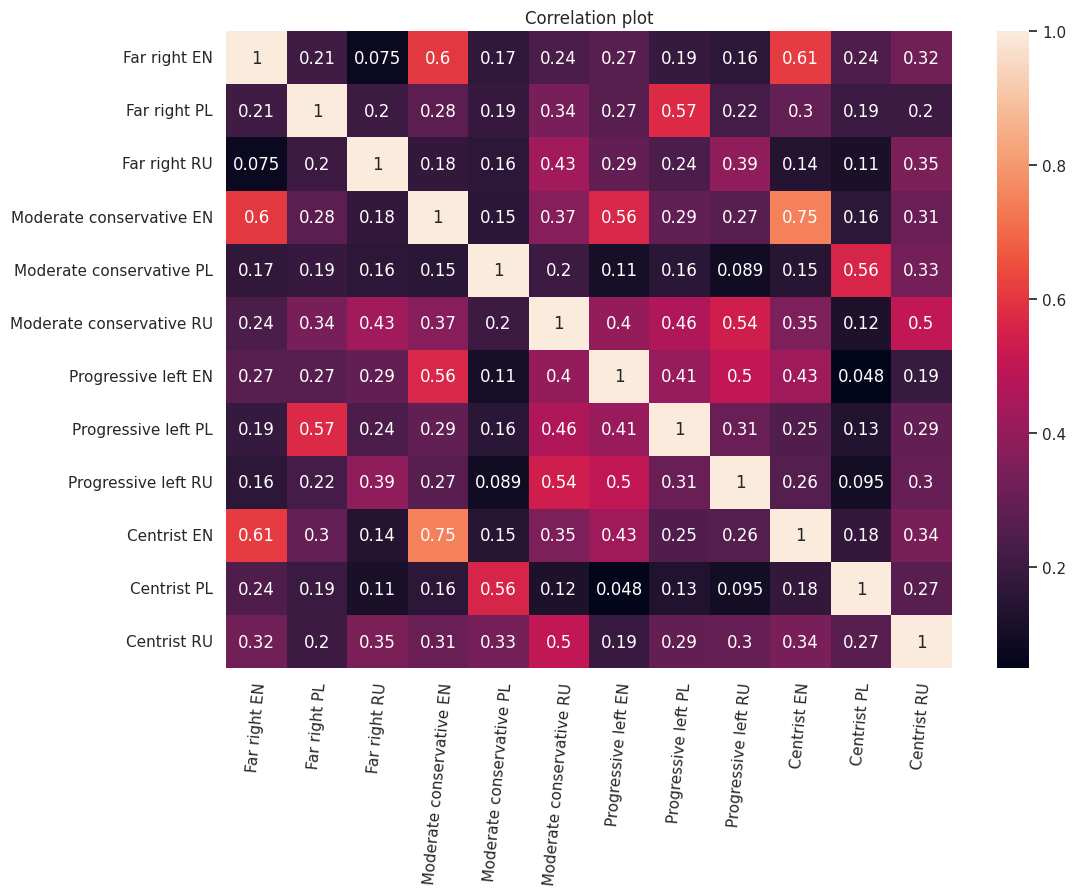

In [30]:
import seaborn as sns
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
corr = data[data['Translation_quality'] == 1.0].drop(['Translation_quality'], axis=1)[mistral_col].corr(numeric_only=True)
plot = sns.heatmap(corr, 
            xticklabels=ticks,
            yticklabels=ticks, annot=True)

plot.set_xticklabels(plot.get_xticklabels(), rotation=85)
plot.set_title('Correlation plot')

In [22]:
data[data['Translation_quality'] == 1.0].drop(['Translation_quality'], axis=1)[mistral_col]

,Mistral_far_right_EN_answer,Mistral_far_right_PL_answer,Mistral_far_right_RU_answer,Mistral_mod_cons_EN_answer,Mistral_mod_cons_PL_answer,Mistral_mod_cons_RU_answer,Mistral_prog_left_EN_answer,Mistral_prog_left_PL_answer,Mistral_prog_left_RU_answer,Mistral_centrist_EN_answer,Mistral_centrist_PL_answer,Mistral_centrist_RU_answer
1,1,1,1,1,0,0,1,0,0,1,0,0
2,1,1,1,1,0,1,1,1,1,1,1,0
3,1,1,0,1,0,0,1,1,0,1,0,0
5,1,1,0,1,0,0,1,1,1,1,0,0
6,0,1,1,0,0,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
296,1,1,1,1,0,1,1,1,1,1,0,1
297,0,0,1,0,0,0,0,0,0,0,0,0
298,1,0,1,1,0,1,1,1,1,1,0,0
299,0,1,1,1,0,1,1,1,1,1,0,1


/home/pihul/Desktop/Projects/Magisterka/.venv/lib64/python3.13/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/home/pihul/Desktop/Projects/Magisterka/.venv/lib64/python3.13/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate obj

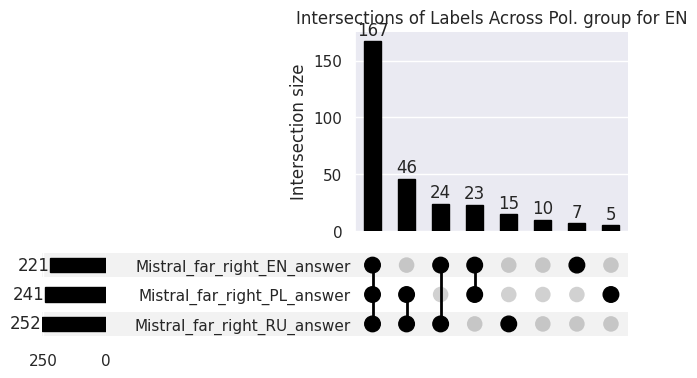

In [23]:
import matplotlib.pyplot as plt
from upsetplot import UpSet, from_indicators
df = data[data['Translation_quality'] == 1.0].drop(['Translation_quality'], axis=1)[mistral_col].iloc[:, [0, 1, 2]]
df_binary = df[df.columns.to_list()] == 1.0
df_binary.columns = ['Mistral_far_right_EN_answer', 'Mistral_far_right_PL_answer', 'Mistral_far_right_RU_answer']
upset_data = from_indicators(df_binary.columns, df_binary)

UpSet(upset_data, show_counts=True, sort_by='cardinality').plot()
plt.title("Intersections of Labels Across Pol. group for EN")
plt.show();